In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.cluster import KMeans
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
sampleData = pd.read_csv("/home/rameshm/Lab/Uber/SampleData/part-00000",  
                         names = ['date', 'latitude', 'longitude', 'baseLLC'])

In [3]:
sampleData.head(4)

,date,latitude,longitude,baseLLC
0,11/1/2016 0:21:00,40.7535,-73.9813,B02512
1,11/1/2016 3:35:00,40.7303,-74.0025,B02512
2,11/1/2016 3:36:00,40.7347,-73.9924,B02512
3,11/1/2016 9:50:00,40.7823,-73.9723,B02512


In [5]:
columns = ['longitude', 'latitude']
featuresData = pd.DataFrame(sampleData, columns=columns)

In [6]:
### For the purposes of this example, we store feature data from our
### dataframe `featuresData`, in the `f1` and `f2` arrays. We combine this into
### a feature matrix `X` before entering it into the algorithm.
f1 = featuresData['longitude'].values
f2 = featuresData['latitude'].values
X=np.matrix(list(zip(f1,f2)))


In [7]:
Y=X[:100]

In [8]:
Y

matrix([[-73.9813,  40.7535],
        [-74.0025,  40.7303],
        [-73.9924,  40.7347],
        [-73.9723,  40.7823],
        [-73.9889,  40.7366],
        [-73.9687,  40.7549],
        [-73.8722,  40.7741],
        [-73.9601,  40.7582],
        [-73.9079,  40.6991],
        [-74.0057,  40.7257],
        [-73.9819,  40.7392],
        [-74.0052,  40.7214],
        [-73.9852,  40.7635],
        [-73.9765,  40.7509],
        [-74.0307,  40.7376],
        [-73.978 ,  40.7771],
        [-74.1772,  40.6951],
        [-73.79  ,  40.6435],
        [-74.0098,  40.7241],
        [-73.8724,  40.7738],
        [-74.1782,  40.6951],
        [-73.9656,  40.7527],
        [-73.9745,  40.7785],
        [-73.9916,  40.7312],
        [-73.96  ,  40.7714],
        [-74.0005,  40.7249],
        [-74.0165,  40.7073],
        [-73.9811,  40.7375],
        [-73.9924,  40.7304],
        [-73.9612,  40.7587],
        [-73.9879,  40.765 ],
        [-73.9624,  40.795 ],
        [-74.0095,  40.7376],
        [-

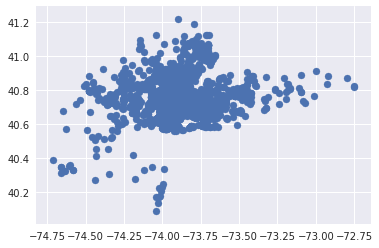

In [9]:
## Draw a scatter plot with above features
plt.scatter(f1,f2)
plt.show()

In [10]:
K = range(1,20)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]

In [12]:
## Find with in sum of squared error
from scipy.spatial.distance import cdist, pdist

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
#cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
sumWithinSS = [sum(d) for d in dist]

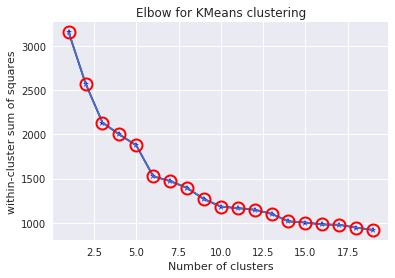

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, sumWithinSS, 'b*-')
ax.plot(K, sumWithinSS, marker='o', markersize=12, 
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

In [15]:
sumWithinSS

[4.0009032860137106,
 3.7210765649555637,
 3.0353492302699832,
 2.2918650337296755,
 1.9658860062594523,
 1.6836124027607922,
 1.4270484795387715,
 1.2964161646110031,
 1.1365769812324946,
 1.0037639533090996,
 0.94670745674263523,
 0.85954916665239423,
 0.78805227119139021,
 0.72936785974968976,
 0.6946051550404756,
 0.66170819089579935,
 0.61909654894113242,
 0.58259837833651595,
 0.55756915293270815]